In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

2022-12-19 11:45:28.366266: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 11:45:32.506807: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 11:45:33.037898: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

2022-12-19 11:46:28.065308: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-19 11:46:28.065482: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


['default', 'despine']


In [3]:
output_dir = "."

In [4]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/all_cells_TemporalProblem.pkl")

In [5]:
order_celltypes = ['Mat. Acinar', 'Imm. Acinar', 'Prlf. Ductal', 'Ductal', 'Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [6]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=True)

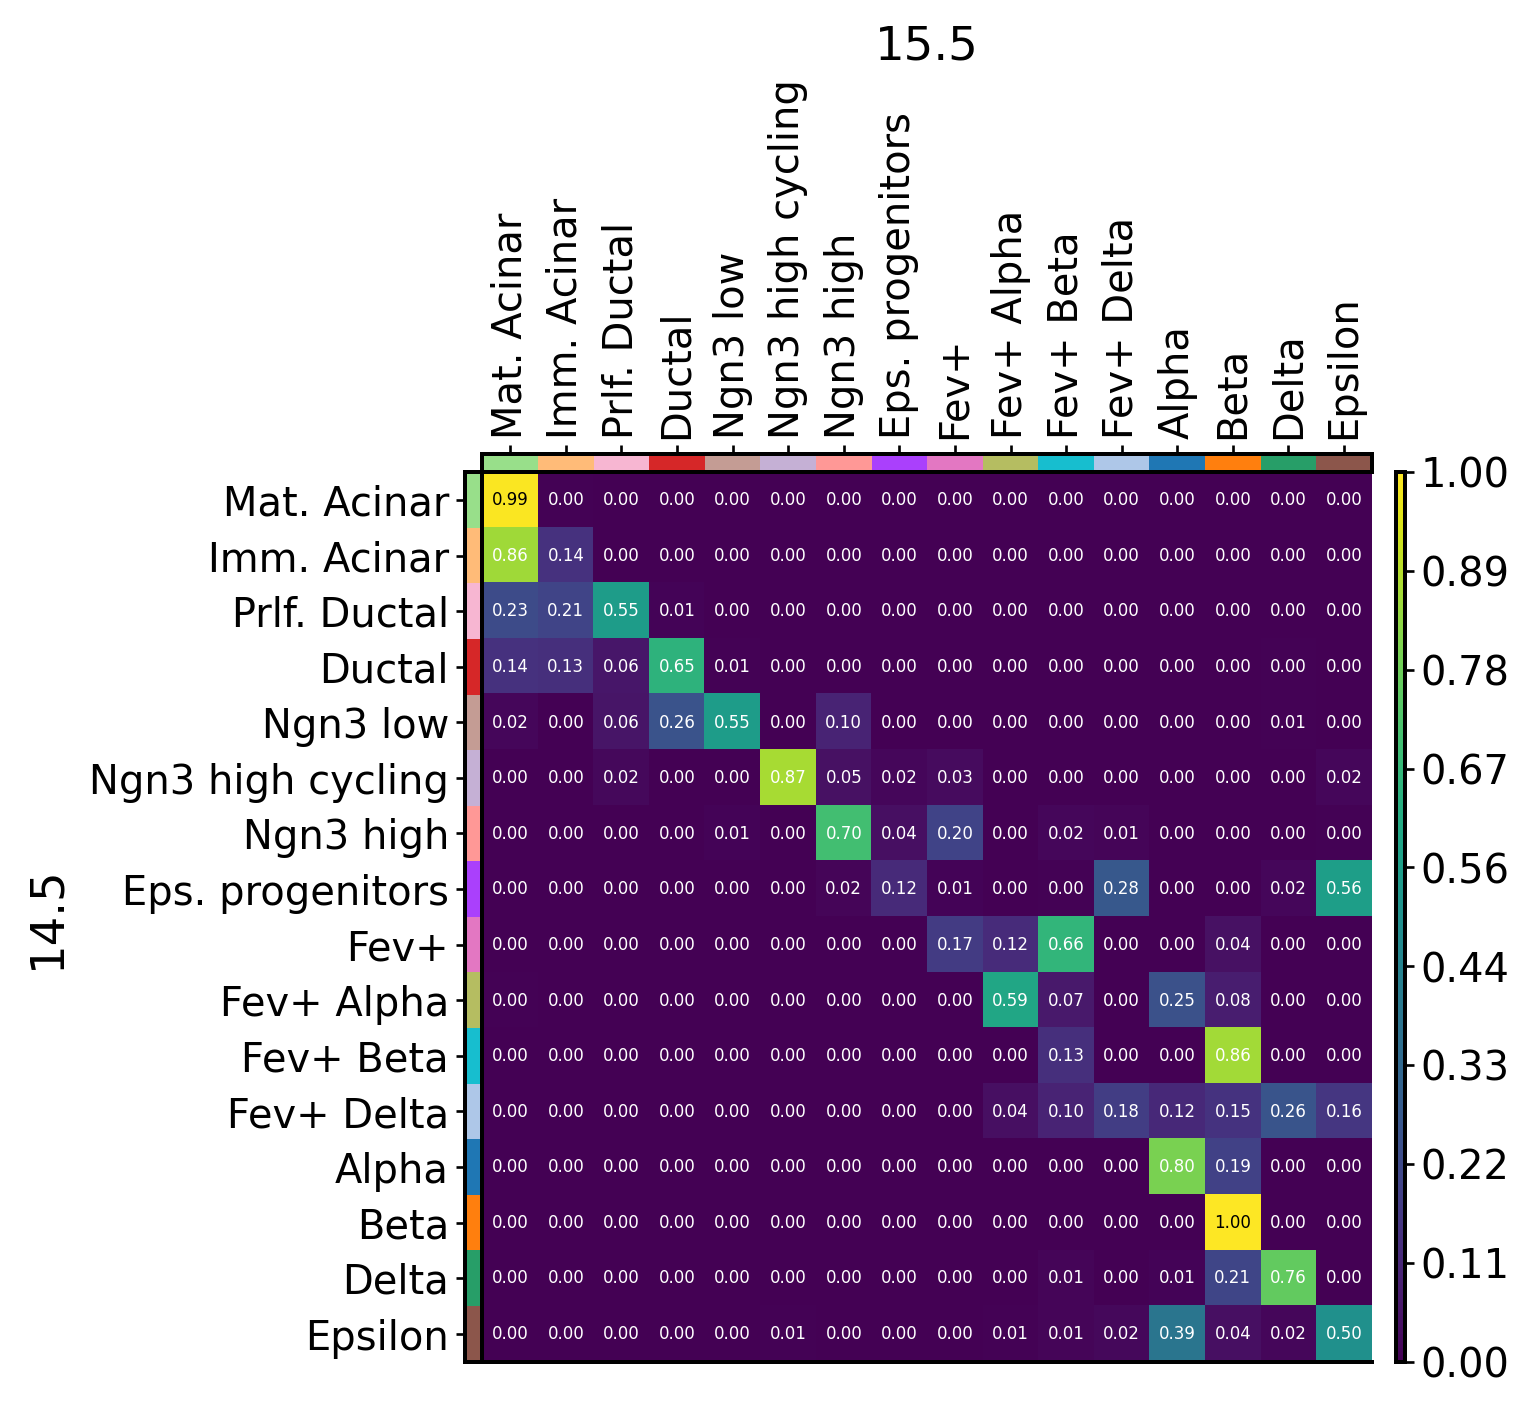

In [7]:
mpl.cell_transition(tp0, dpi=120, fontsize=5, save=os.path.join(output_dir, "cell_transition_all_forward.png"))

In [8]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=False)

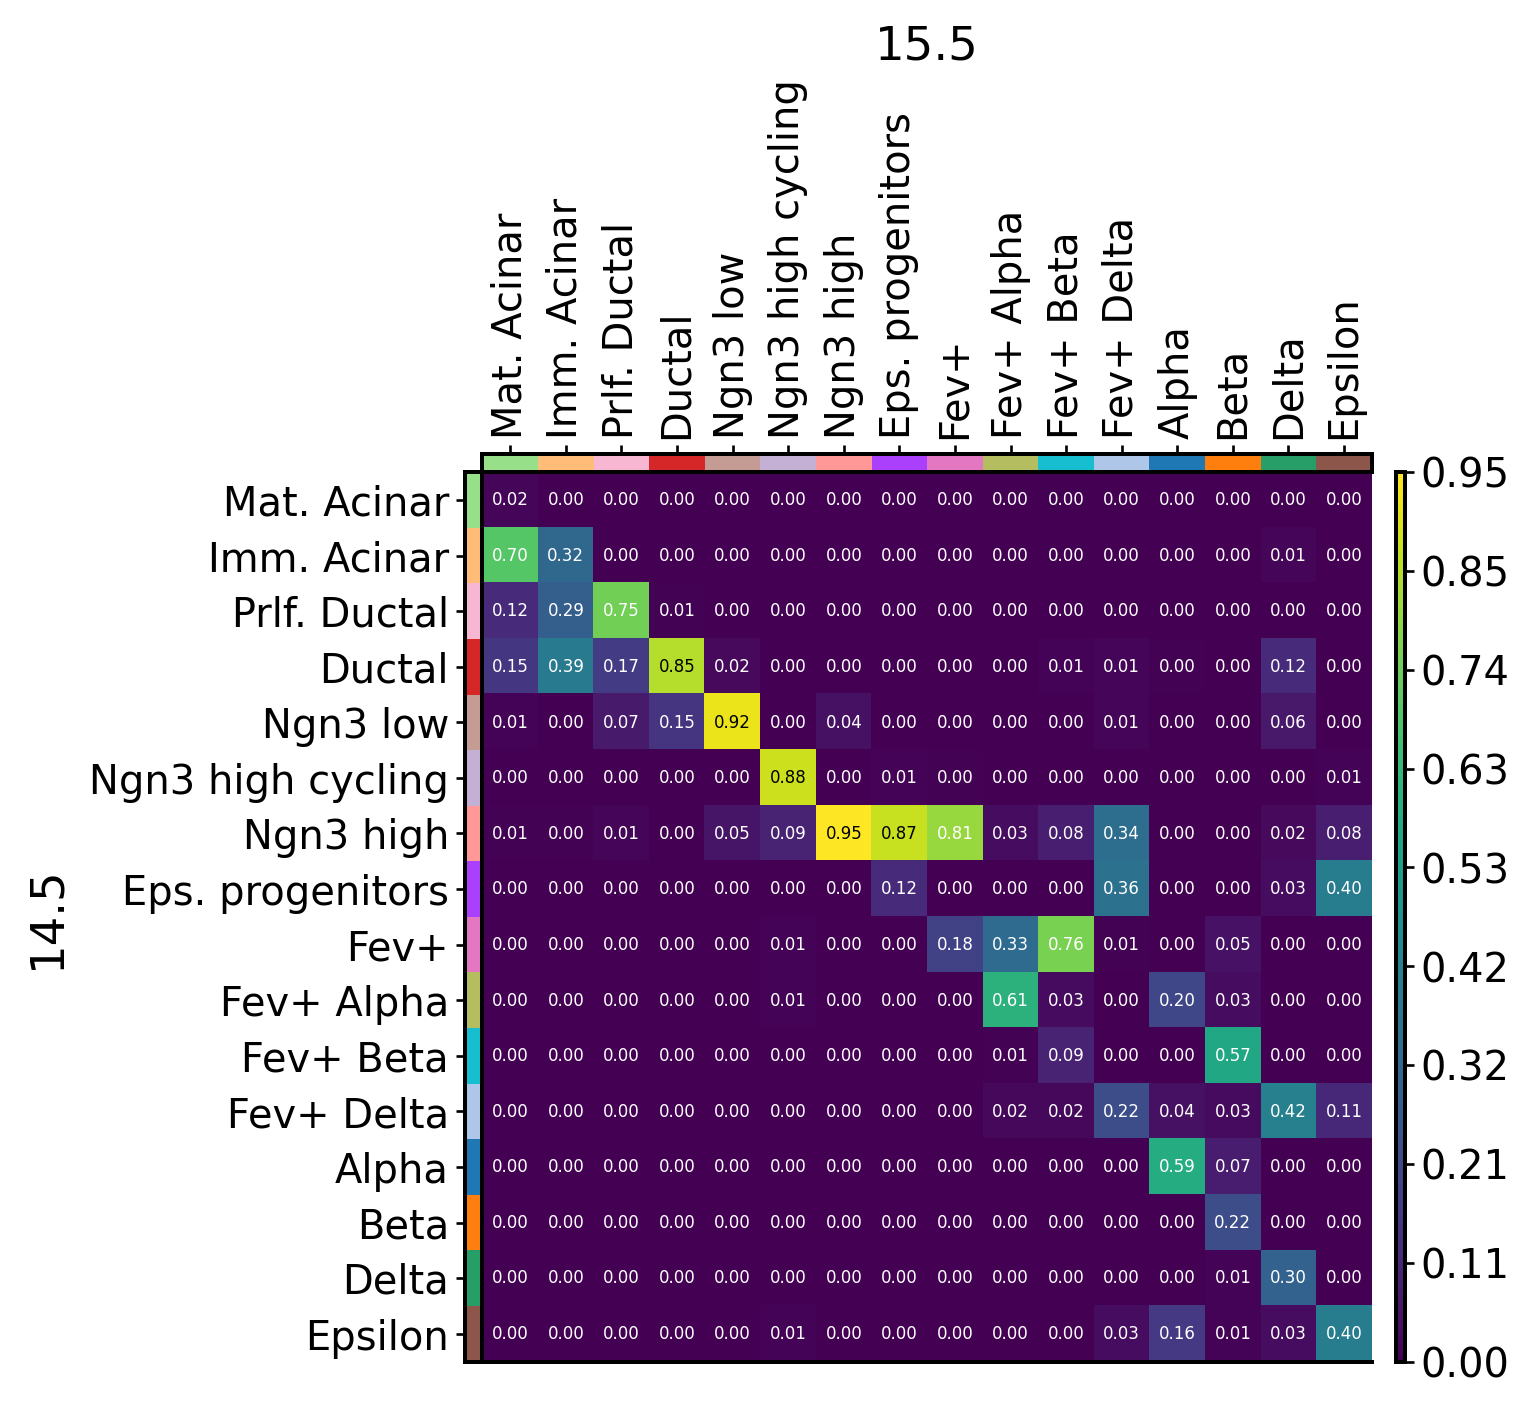

In [9]:
mpl.cell_transition(tp0, dpi=120, fontsize=5, save=os.path.join(output_dir, "cell_transition_all_backward.png"))

In [10]:
tp0.sankey(source=14.5, target=15.5, source_groups={"celltype": order_celltypes}, target_groups={"celltype": order_celltypes}, threshold=0.05, normalize=True)

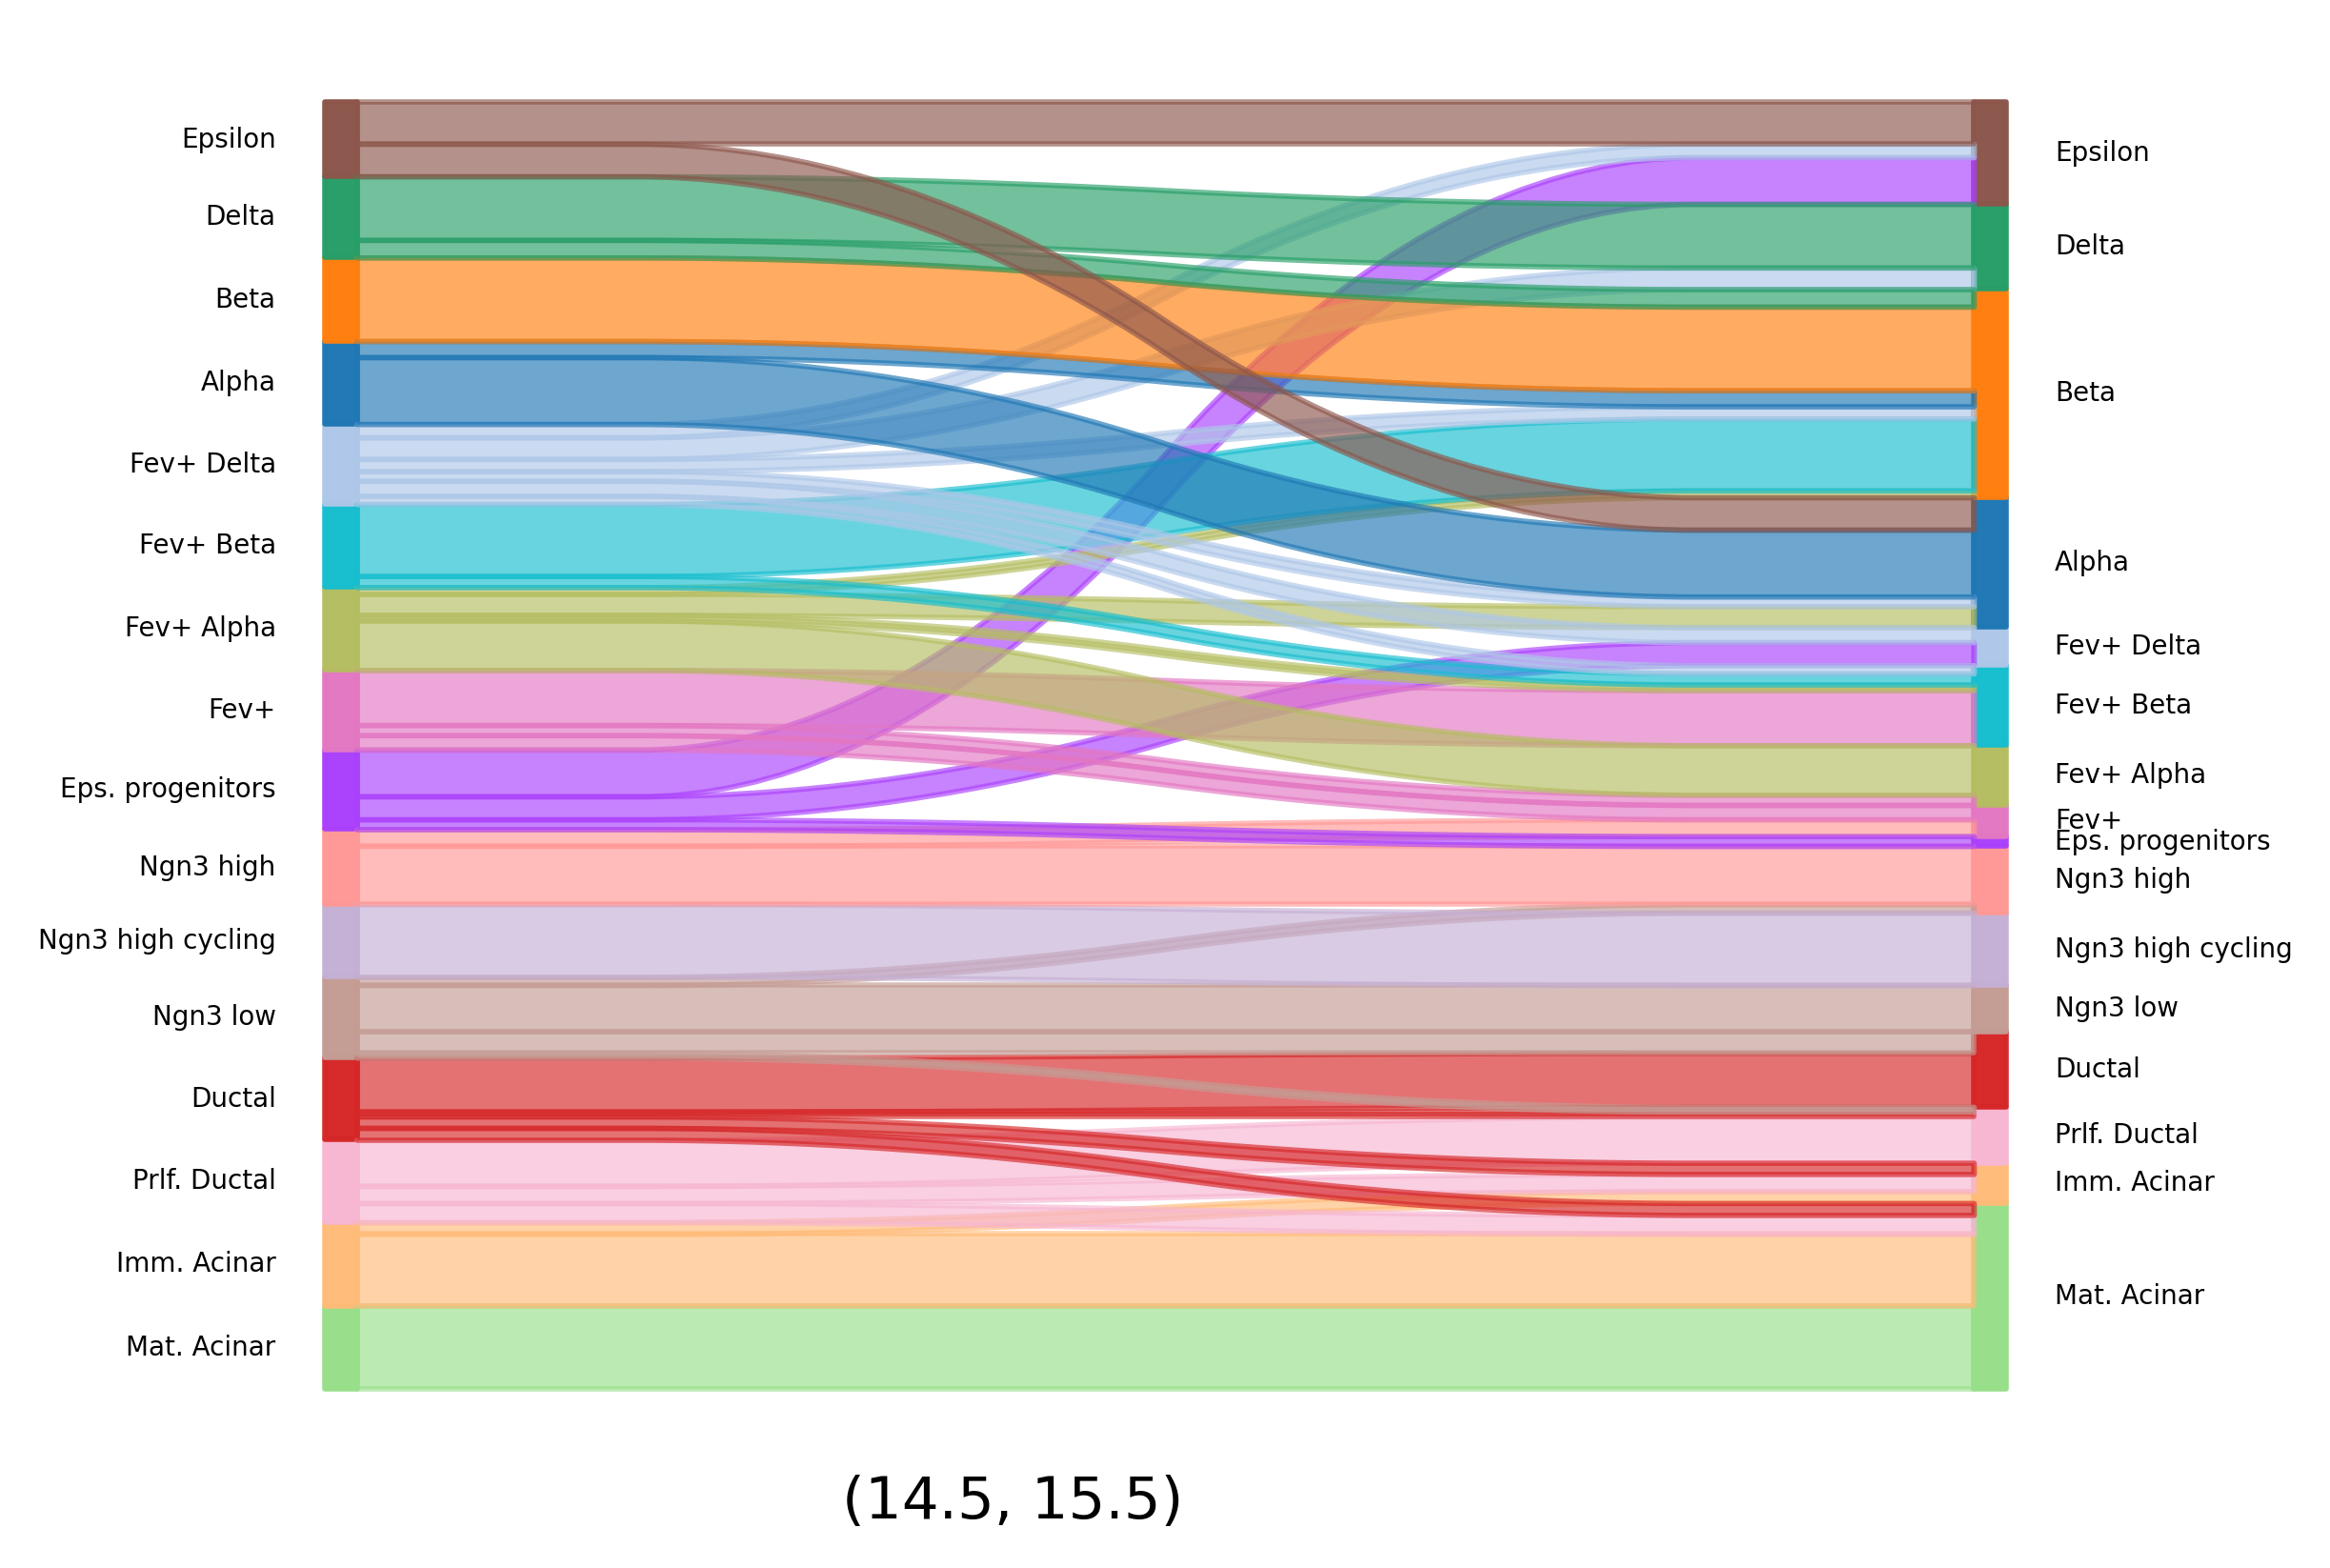

In [11]:
fig = mpl.sankey(tp0, dpi=200, figsize=(6,4), fontsize=5, return_fig=True, save=os.path.join(output_dir, "sankey_forward.png"))
fig

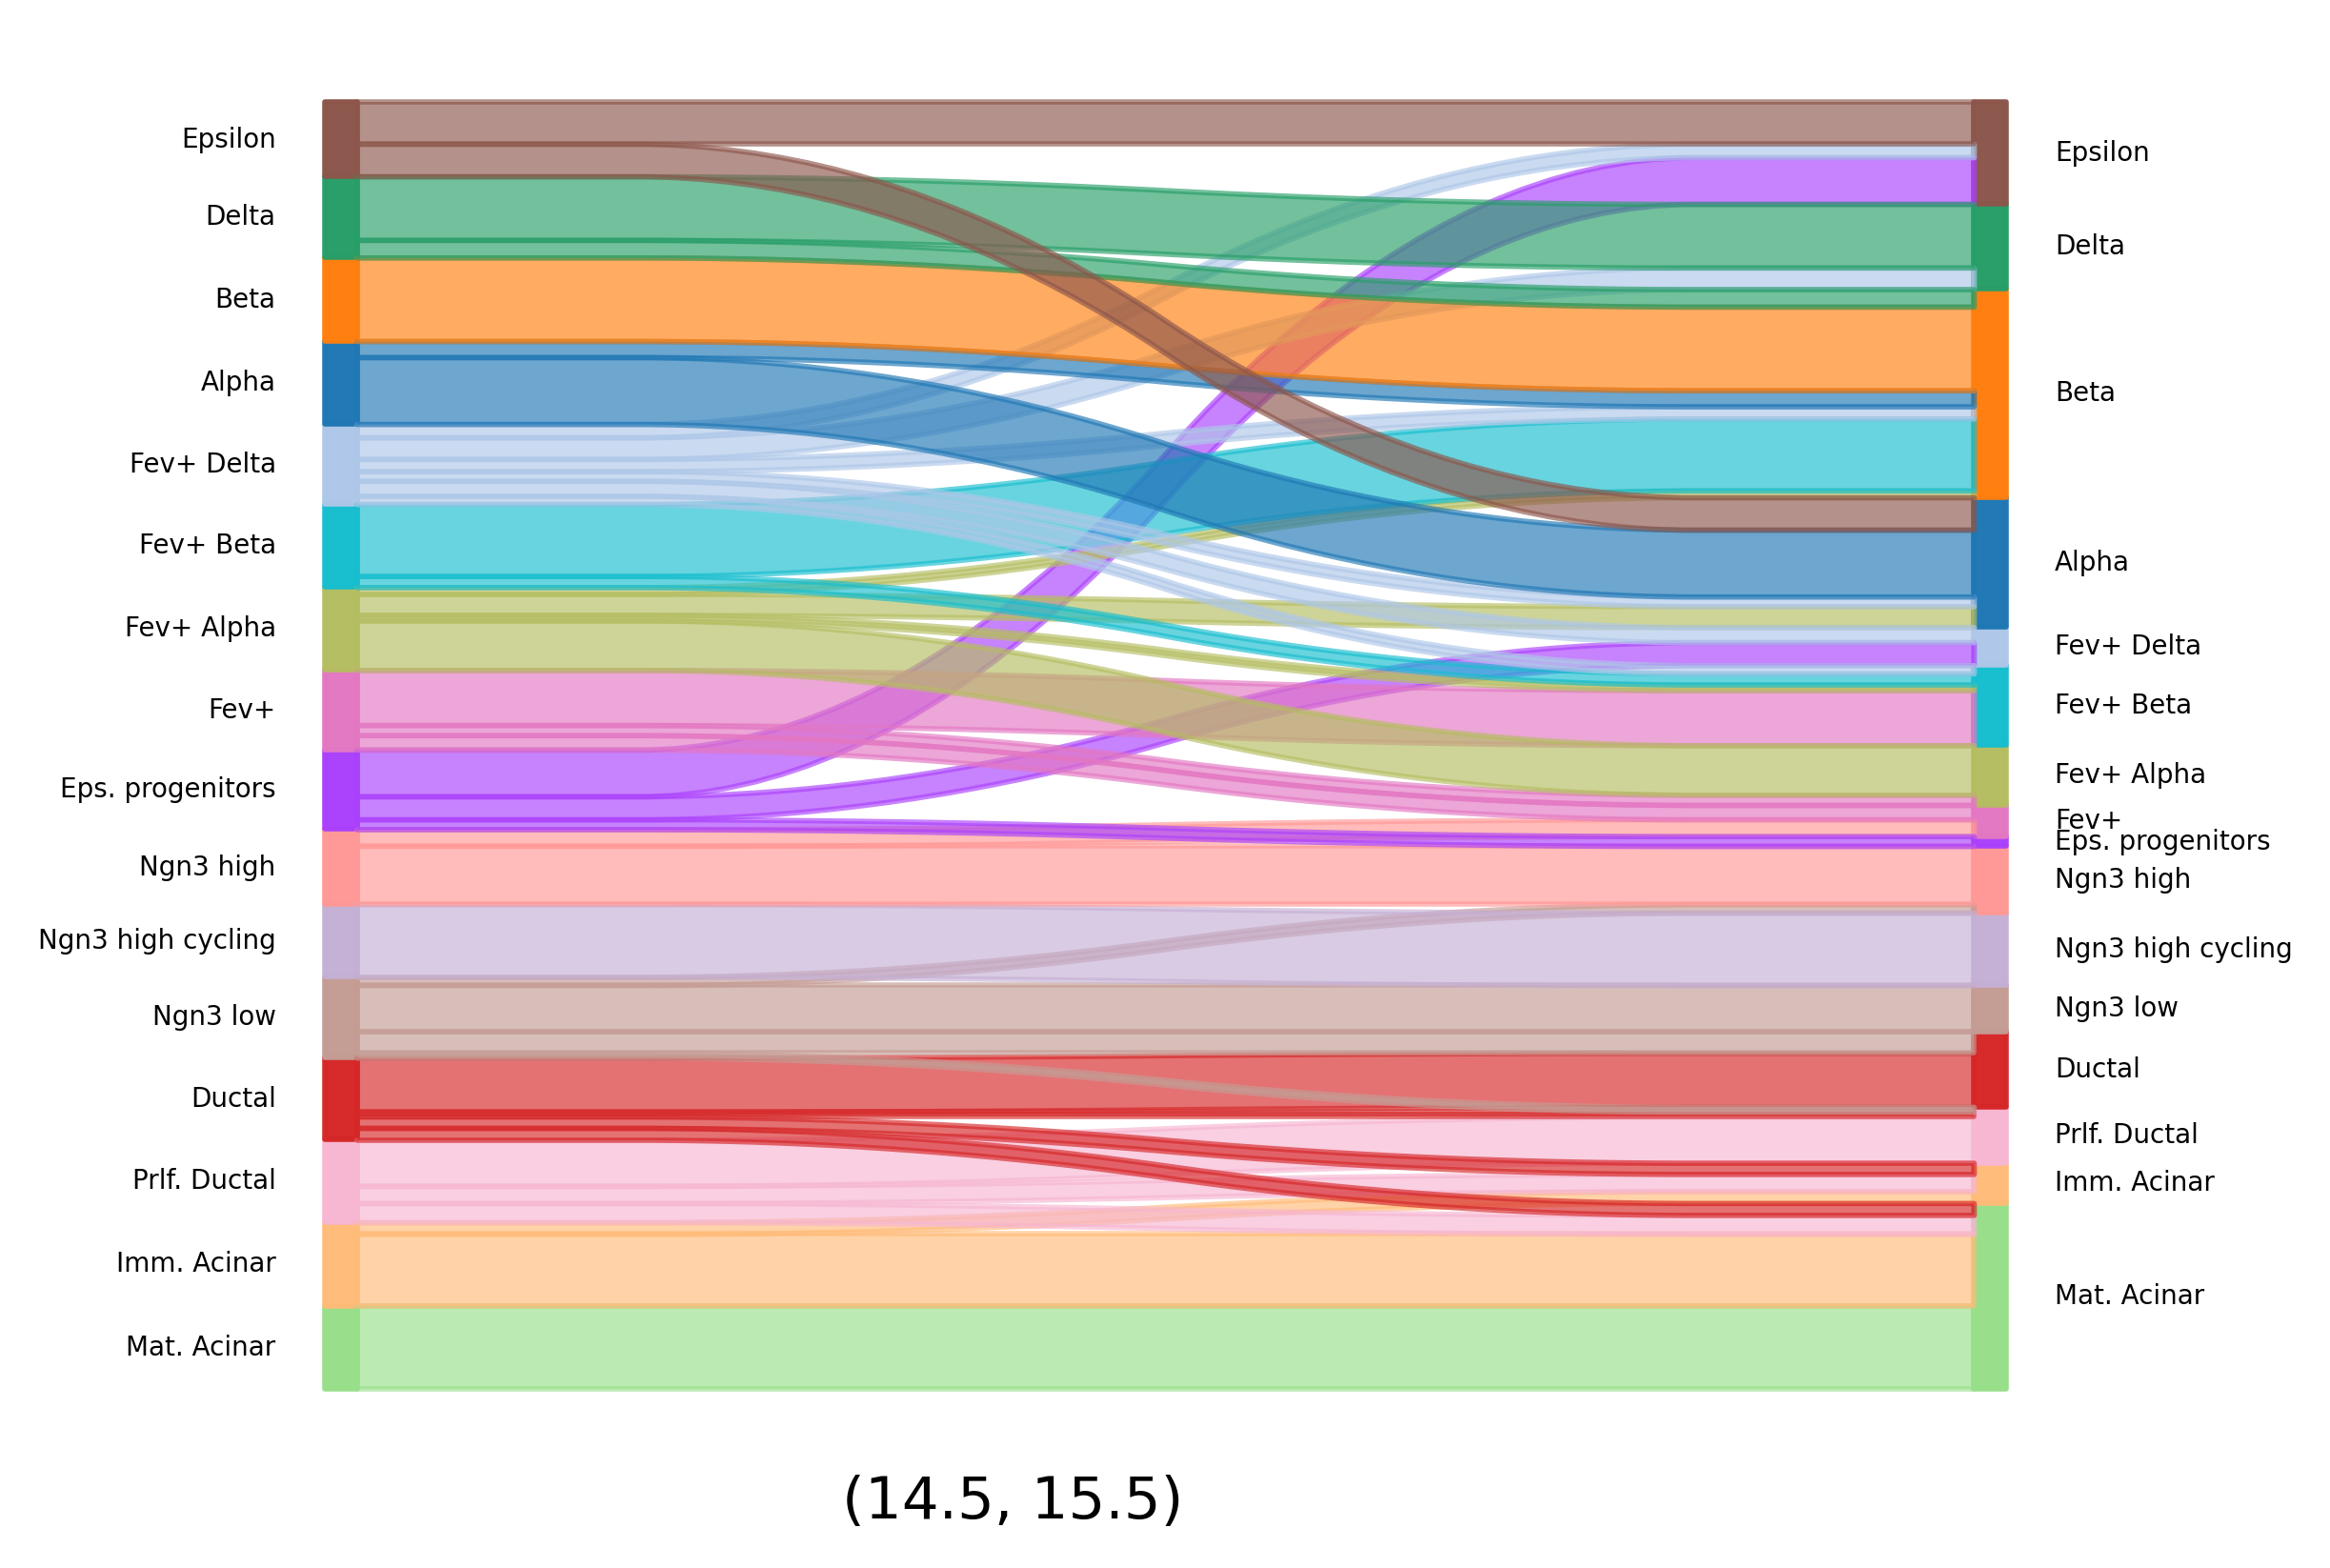

In [12]:
mpl.sankey(tp0, dpi=200, figsize=(6,4), fontsize=5, return_fig=True, forward=False, save=os.path.join(output_dir, "sankey_forward.png"))

In [13]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=True)